In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.4.1
GPU name: 


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb


In [3]:
# Download and assign the data set using load_data()
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Inspect the dataset

In [4]:
# Inspect the type of the data

print(x_train.shape), print(type(x_train))

(25000,)
<class 'numpy.ndarray'>


(None, None)

In [5]:
# Inspect the shape of the data



In [6]:
# Display the first dataset element input
# Notice encoding
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [7]:
# Display the first dataset element output
y_train[0]


1

#### Load dataset with different options

In [8]:
# Load the dataset with defaults
imdb.load_data(path='imdb.npz', 
               index_from=3)
# ~/.keras/dataset/

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [9]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=1000
)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 

In [10]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, num_words=1000, oov_char=2, maxlen=500, start_char=1)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((array([list([2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([2, 194, 2, 194, 2, 78, 228, 2, 2, 2, 2, 2, 134, 26, 2, 715, 2, 118, 2, 14, 394, 20, 13, 119, 954, 

In [11]:
# Limit the sequence lengths to 500 using maxlen



In [12]:
 # Use '1' as the character that indicates the start of a sequence

 

#### Explore the dataset word index

In [13]:
# Load the imdb word index using get_word_index()
imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [14]:
# View the word index as a dictionary,
# accounting for index_from.
index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [15]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']
imdb_word_index['the']

4

In [16]:
# View an input sentence
inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [17]:
# Get the sentiment value
y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [18]:
# Load the imdb data set
import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Preprocess the data with padding

In [19]:
# Inspect the input data shape

x_train.shape

(25000,)

In [20]:
# Pad the inputs to the maximum length using maxlen
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_x_train = pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [21]:
# Inspect the output data shape
print(padded_x_train.shape)

(25000, 300)


#### Create a Masking layer

In [22]:
# Import numpy 
import numpy as np 
# (batch, sequence, features)


In [23]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

np.expand_dims(padded_x_train, -1)

array([[[   1],
        [  14],
        [  22],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [ 194],
        [1153],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  14],
        [  47],
        ...,
        [   0],
        [   0],
        [   0]],

       ...,

       [[   1],
        [  11],
        [   6],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [1446],
        [7079],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  17],
        [   6],
        ...,
        [   0],
        [   0],
        [   0]]], dtype=int32)

In [24]:
# Create a Masking layer 
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [25]:
# Pass tf_x_train to it
masked_x_train = masking_layer(tf_x_train)

In [26]:
# Look at the dataset
masked_x_train

<tf.Tensor: shape=(25000, 300), dtype=float32, numpy=
array([[1.000e+00, 1.400e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.940e+02, 1.153e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.400e+01, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.100e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.446e+03, 7.079e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.700e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)>

In [27]:
# Look at the ._keras_mask for the dataset
# tf_x_train._keras_mask This layer does not have it
masked_x_train._keras_mask

<tf.Tensor: shape=(25000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [28]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)

In [29]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
sequence_of_indices = tf.constant(([0], [1], [5], [500])) #(batch, sequnce , features)
sequence_of_embedding = embedding_layer(sequence_of_indices)
sequence_of_embedding

<tf.Tensor: shape=(4, 1, 16), dtype=float32, numpy=
array([[[-0.04912321, -0.04661554, -0.00798864, -0.00739967,
          0.03466243,  0.00206026,  0.02585046, -0.03344461,
          0.03401089,  0.00930103,  0.02452883,  0.01112891,
          0.01652581,  0.00715212,  0.01419351, -0.04004733]],

       [[-0.00439746, -0.00520632, -0.01087675,  0.03190278,
         -0.00360122,  0.01822511, -0.03909007, -0.00772627,
          0.0050473 , -0.04298003, -0.04273697,  0.03361284,
         -0.01607541, -0.01849087,  0.02560977, -0.03736864]],

       [[-0.02393216,  0.04257289, -0.00269593,  0.03978464,
         -0.03256053, -0.01743724, -0.01746069, -0.03012861,
          0.00978556,  0.03325513,  0.04453727,  0.03059203,
          0.01025502, -0.01237196,  0.01839192,  0.03471308]],

       [[ 0.04134171, -0.03381268,  0.01509616,  0.04047866,
         -0.04383725,  0.00320167,  0.04650031, -0.04928521,
          0.02635095, -0.04131856, -0.03583397, -0.02129968,
          0.01020471,  0

In [30]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]


array([[-0.04912321, -0.04661554, -0.00798864, ...,  0.00715212,
         0.01419351, -0.04004733],
       [-0.00439746, -0.00520632, -0.01087675, ..., -0.01849087,
         0.02560977, -0.03736864],
       [ 0.00294511,  0.01620808,  0.04605872, ...,  0.04654714,
        -0.046113  , -0.01171106],
       ...,
       [-0.0456241 ,  0.04444737,  0.00021695, ...,  0.0369246 ,
        -0.02359085,  0.03695315],
       [-0.00065199,  0.04825031, -0.01141555, ..., -0.02070349,
         0.01587038,  0.03263154],
       [ 0.04134171, -0.03381268,  0.01509616, ...,  0.04288163,
        -0.01701574, -0.01807363]], dtype=float32)

In [31]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][14, :]

array([ 0.04465998, -0.03988319,  0.00654418, -0.008026  ,  0.02652225,
        0.00731392, -0.01040276,  0.00538313, -0.00661642,  0.02351287,
       -0.00679729, -0.04891212,  0.01255871, -0.04966773, -0.02389176,
       -0.04508014], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [32]:
# Create a layer that uses the mask_zero kwarg
masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [33]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(4, 1), dtype=bool, numpy=
array([[False],
       [ True],
       [ True],
       [ True]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [35]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [36]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [37]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [38]:
# Get the word index
imdb_word_index = get_imdb_word_index()


In [39]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [40]:
# View the first dataset example sentence

[[inv_imdb_word_index] for index in x_train[100] if index > 2]

[[{1410: 'woods',
   2347: 'hanging',
   2291: 'woody',
   6748: 'arranged',
   2340: 'bringing',
   1638: 'wooden',
   4012: 'errors',
   3232: 'dialogs',
   361: 'kids',
   5036: 'uplifting',
   7095: 'controversy',
   9880: 'projection',
   7182: 'stern',
   5623: 'morally',
   5285: 'wang',
   180: 'want',
   2105: 'travel',
   6704: 'barbra',
   3932: 'dinosaurs',
   354: 'wrong',
   4762: 'subplots',
   9094: 'welcomed',
   6705: 'butcher',
   1182: 'fit',
   1929: 'screaming',
   4289: 'fix',
   9656: 'hurting',
   301: 'effects',
   8777: 'barton',
   6194: 'ingrid',
   7918: 'adapt',
   4013: 'disturbed',
   1287: 'purpose',
   6794: 'olds',
   886: 'needed',
   1299: 'master',
   5401: 'positively',
   9838: 'zatoichi',
   546: 'feeling',
   5624: 'affairs',
   7801: 'wholesome',
   1359: 'cinematic',
   4990: 'tech',
   659: 'saying',
   8424: 'padded',
   5747: 'tempted',
   7478: 'plate',
   3901: 'altogether',
   8778: 'lds',
   1779: 'nicely',
   4590: 'mummy',
   774: '

#### Build an Embedding layer into a model

In [41]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [42]:
# Specify an embedding dimension

embedding_dim = 16


In [43]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=max_index_value+1,  output_dim=embedding_dim, mask_zero=False),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])


In [44]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.Input((None, ))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [46]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

In [47]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)

Epoch 1/5
782/782 [==============================] - 8s 9ms/step - loss: 0.6921 - accuracy: 0.5248 - val_loss: 0.6847 - val_accuracy: 0.6438
Epoch 2/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6792 - accuracy: 0.6655 - val_loss: 0.6522 - val_accuracy: 0.7422
Epoch 3/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6416 - accuracy: 0.7337 - val_loss: 0.6013 - val_accuracy: 0.7641
Epoch 4/5
782/782 [==============================] - 7s 8ms/step - loss: 0.5904 - accuracy: 0.7809 - val_loss: 0.5526 - val_accuracy: 0.7844
Epoch 5/5
782/782 [==============================] - 7s 8ms/step - loss: 0.5390 - accuracy: 0.8140 - val_loss: 0.5090 - val_accuracy: 0.8047


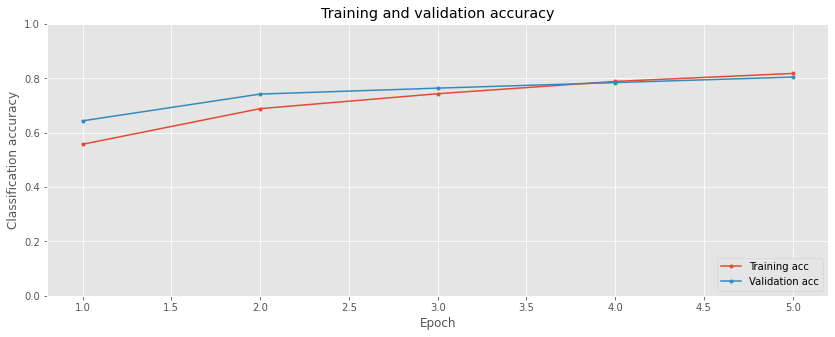

In [48]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [49]:
# Retrieve the embedding layer's weights from the trained model
weights = model.layers[1].get_weights()[0]

In [50]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('drive/My Drive/Colab Notebooks/', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('drive/My Drive/Colab Notebooks/', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [51]:
# Create a SimpleRNN layer and test it
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN

simplernn_layer = SimpleRNN(units=16)


In [52]:
# Note that only the final cell output is returned
sequence = tf.constant([[[1.,1.],[2.,2.],[56.,-100]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-0.99998665, -1.        ,  1.        , -0.99999213, -1.        ,
        -1.        ,  1.        , -1.        ,  1.        ,  1.        ,
        -1.        , -1.        ,  1.        , -1.        , -1.        ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [53]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [54]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [55]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [56]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

#### Create a recurrent neural network model

In [57]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())
embedding_dim = 16



In [58]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=max_index_value +1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.LSTM(units=16),
                             tf.keras.layers.Dense(1, activation='sigmoid')])



#### Compile and fit the model

In [59]:
# Compile the model with binary cross-entropy loss

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Fit the model and save its training history
history = model.fit(x_train, y_train, epochs=3, batch_size=32)


Epoch 1/3
536/536 [==============================] - 62s 107ms/step - loss: 0.5815 - accuracy: 0.6591
Epoch 2/3
536/536 [==============================] - 57s 107ms/step - loss: 0.2562 - accuracy: 0.9032
Epoch 3/3
536/536 [==============================] - 57s 107ms/step - loss: 0.1571 - accuracy: 0.9470


#### Plot learning curves

In [61]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored

#### Make predictions with the model

In [62]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [63]:
# Get the model prediction using model.predict()
model.predict(x_test[None, 0, :])


array([[0.04506254]], dtype=float32)

In [64]:
# Get the corresponding label
y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [65]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [66]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [67]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [68]:
# Get the word index using get_imdb_word_index()
imdb_word_index = get_imdb_word_index(num_words=5000)


#### Build stacked and bidirectional recurrent models

In [69]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [72]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
model = Sequential([Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim, mask_zero=True ),
                    LSTM(units=32, return_sequences=True),
                    LSTM(units=32, return_sequences=False),
                    Dense(1, activation='sigmoid')])

In [73]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'
from tensorflow.keras.layers import Bidirectional, GRU
model = Sequential([Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim, mask_zero=True),
                    Bidirectional(layer=LSTM(8), merge_mode='sum',backward_layer=GRU(units=8, go_backwards=True)),
                    Dense(1, activation='sigmoid')])


In [74]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = Sequential([Embedding(input_dim=max_index_value + 1, output_dim=embedding_dim),
                    Bidirectional(LSTM(8, return_sequences=True), merge_mode='concat'),
                    GRU(8, return_sequences=False),
                    Dense(1, activation='sigmoid')])

#### Compile and fit the model

In [79]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=3, batch_size=32)


Epoch 1/3
536/536 [==============================] - 102s 181ms/step - loss: 0.5655 - accuracy: 0.6756
Epoch 2/3
536/536 [==============================] - 98s 183ms/step - loss: 0.2740 - accuracy: 0.8927
Epoch 3/3
536/536 [==============================] - 98s 182ms/step - loss: 0.1827 - accuracy: 0.9352


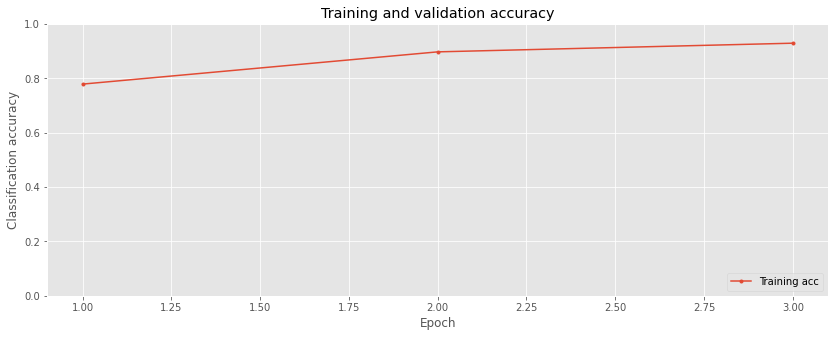

In [82]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
# val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
# val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
# plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);